In [1]:
# VER README
# Notebooks con Markdown en celdas de coódigo para renderizar sin celdas ni prompt

import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tabulate import tabulate
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sympy import *
from IPython.display import Markdown as md

%matplotlib inline

# Data
DATA_PATH = "data/"

# Funciones
rnd = lambda x: round(x, 2)

# Espectrometría de partículas alfa y beta. Absorción de partículas alfa

Contamos con un detector de barrera de superficie con el que detectamos partículas alfa provenientes de una fuente ($Am^{241}(\alpha)$, $Sr^{90}(\beta)$, $Cs^{137}(\beta; CI)$) radiactiva mientras variamos la distancia. No tendremos medidas de fondo por ser prácticamente despreciable.

In [2]:
# Datos período de una kuestra radiactiva

# tiempo de acumulación: 300s
t_acumulacion = 300
# medidas: practica6.csv donde columnas son distancia (cm) y el número de cuentas
data_p6 = DATA_PATH + "practica6.csv"
df1_p6 = pd.read_csv(data_p6)
df1_p6["bq"] = df1_p6["area (cuentas)"] / t_acumulacion

print(tabulate(df1_p6, headers="keys", tablefmt="presto"))

    |   distancia (cm) |   area (cuentas) |        bq
----+------------------+------------------+-----------
  0 |              1   |            61281 | 204.27
  1 |              1.5 |            36195 | 120.65
  2 |              2   |            24549 |  81.83
  3 |              2.5 |            13676 |  45.5867
  4 |              3   |             9207 |  30.69
  5 |              3.5 |              563 |   1.87667


Coeficientes: -75.319
Término independiente: 250.286
Mean Squared Error (MSE): 332.39
R2: 0.93


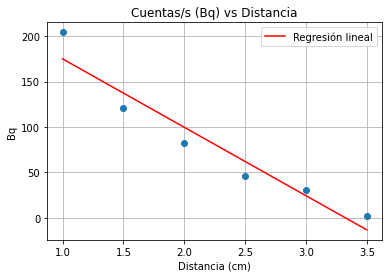

In [3]:
y = df1_p6["bq"].to_numpy()
x = df1_p6["distancia (cm)"].to_numpy()

# Creamos el objeto para regresion lineal
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regr.fit(x.reshape(-1, 1), y)
# Hacemos las predicciones
y_pred = regr.predict(x.reshape(-1, 1))

# Tangente
print("Coeficientes: %.3f" % regr.coef_[0])
# Término independiente
print("Término independiente: %.3f" % regr.intercept_)
# MSE
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y, y_pred))
# R2, tiende a 1.0
print("R2: %.2f" % r2_score(y, y_pred))


plt.plot(x, y, "o")
plt.plot(x, y_pred, color="red", label="Regresión lineal")
plt.title("Cuentas/s (Bq) vs Distancia")
plt.xlabel("Distancia (cm)")
plt.ylabel("Bq")
plt.grid(True)
plt.legend()
plt.show()

In [4]:
alcance = rnd(-regr.intercept_ / regr.coef_[0])

TEXT = f"Mediante un ajuste lineal podemos extrapolar el alcance (punto de corte con eje X), \
         que toma un valor de {alcance} cm."

md(TEXT)

Mediante un ajuste lineal podemos extrapolar el alcance (punto de corte con eje X),          que toma un valor de 3.32 cm.

In [5]:
# Datos alfa
area_t = 204.27 # bq
actividad_inicial_alfa = 37000 # bq
tiempo_medicion_alfa = 24 # años, septiembre 2010 a marzo 2012
periodo_alfa = 458 # años
lambda_alfa = np.log(2)/periodo_alfa # años^(-1)
actividad_corregida_alfa = actividad_inicial_alfa*np.e**(-lambda_alfa*tiempo_medicion_alfa) # bq
epsilon_alfa = area_t/actividad_corregida_alfa

**Eficiencia del detector para $\alpha$**

Se toma el valor de lárea cuando la muestra está lo más cercana posible al detector, es decir, a 1cm.

- Área/t: $A' = 204.27$ Bq

- Actividad inicial de la muestra: $A_0 = 37$ kBq

- Fecha: año 1988. Tiempo transcurrido entre 1988 y 2012: 24 años. $T_{1/2} = 458 a -> \lambda = \frac{ln2}{T_{1/2}} = 0.0015 a^{-1}$

- Actividad corregida: $A = A_0e^{- \lambda T_m} = 35680.19 Bq$

- Eficiencia $\epsilon = A'/A = 0.0057$

In [6]:
# Datos beta
area_t = 370.56 # bq
actividad_inicial_beta = 37000 # bq
tiempo_medicion_beta = 24 # años, septiembre 2010 a marzo 2012
periodo_beta = 28.1 # años
lambda_beta = np.log(2)/periodo_beta # años^(-1)
actividad_corregida_beta = actividad_inicial_beta*np.e**(-lambda_beta*tiempo_medicion_beta) # bq
epsilon_alfa = area_t/actividad_corregida_beta

**Eficiencia del detector para $\beta$**

Se toma el valor del área para el espectro del $Sr^{90}$

- Área/t: $A' = 370.56$ Bq

- Actividad inicial de la muestra: $A_0 = 37$ kBq

- Fecha: año 1988. Tiempo transcurrido entre 1988 y 2012: 24 años. $T_{1/2} = 28.1 a -> \lambda = \frac{ln2}{T_{1/2}} = 0.024 a^{-1}$

- Actividad corregida: $A = A_0e^{- \lambda T_m} = 20468.88 Bq$

- Eficiencia $\epsilon = A'/A = 0.018$

## Conclusiones

1. El espectro debe tener picos en cada una de las siguientes energías: 5545, 5513, 5486, 5443 y 5388 keV.

2. El alcance de partículas $\alpha$ en aire es del orden de unos pocos centímetros, con lo cual serían indetectables en fuentes alejadas.

3. Las partículas $\beta$ tienen un espectro continuo porque en cada proceso existe un reparto de energía entre el electrón y el antineutrino. La forma del espectro parte de energía cero, aumenta y disminuye hasta llegar un punto en el que la energía cinética máxima del electrón es igual a la diferencia de masas entre el estado inicial y final que corresponde al caso en el que la energía cinética del antineutrino es cero.

4. el espectro del $Sr^{90}$ tiene sólo una componente porque es un radioisótopo $\beta^{-}$ puro que sólo emite electrones y antineutrinos eléctronicos.

5. El filtro de plomo mantiene la forma del espectro beta, reduciendo su área en un 90%

6. El contador G-M es mejor porque resultó tener una eficiencia del 11%, mientras que éste es de 1.8%

7. Tiene esa forma debido a que el Cs decae al $Ba^{137}$ y éste emite un fotón gamma de 667 keV con un período corto, hasta el nivel fundamental del $Ba^{137}$, que son los picos pequeños del espectro.